**Import Libraries**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

**Load Data**

In [2]:
train = pd.read_csv('train.csv')

In [8]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
train.dropna(inp)

**Survival By Gender**

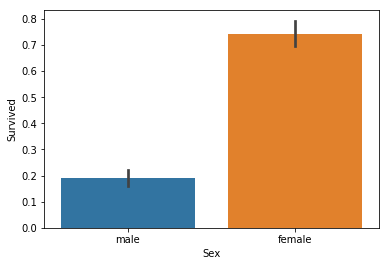

In [14]:
sns.barplot('Sex','Survived',data=train)
# plt.hist('Survived','Sex',data=train)

**Survival By Boarding Class**

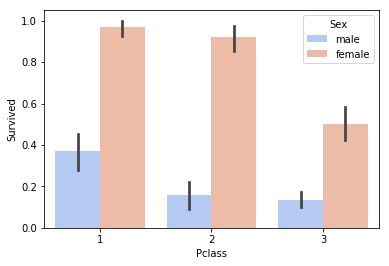

In [24]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train, palette='coolwarm')

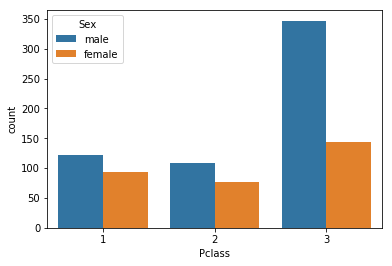

In [31]:
sns.countplot('Pclass',hue='Sex',data=train)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

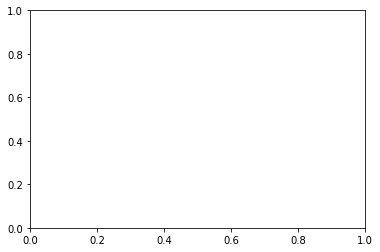

In [34]:
sns.distplot(train)